# Module-4 Supervised Classification
- KNN
- Naive Baye's classifier
- Evaluation metrics: ROC , confusion matrix,precision and recall , F1 score

# Supervised Classification:
- Supervised learning is when the model is trained on a labeled dataset , it is up to the algorithm to  classify data or predict outcomes accurately.
- Supervised learning helps organizations solve for a variety of real-world problems at scale, such as classifying spam in a separate folder from your inbox.

# K-nearest neighbour Classification

- knn is a classification algorithm
- knn works by finding the most similar data points in the training data and attempt to make a educated guess based on their classification
- algorithm steps:
    - select a value for k
    - calculate the euclidean diatance between the point to be classified and every other point in the training data-set
    - pick the k closest data points
    - choose the data point which has the high vote 

### 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import dataset

In [2]:
data=pd.read_csv('Iris.csv')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

### 3. Taking care of missing data

In [4]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 4. Visualise the data

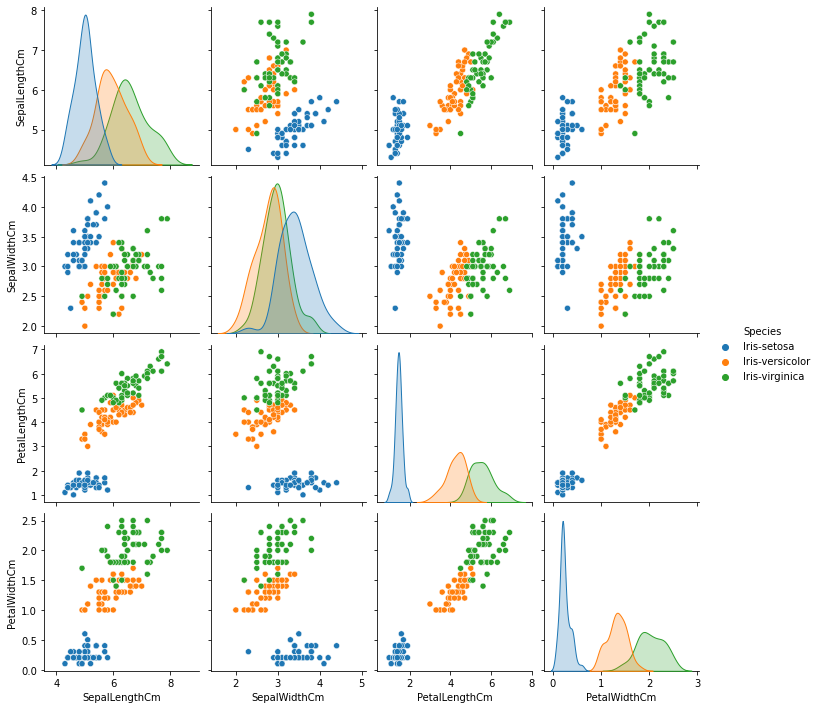

In [5]:
sns.pairplot(data,hue='Species')

### 5. Splitting the train and test set

In [6]:
from sklearn.model_selection import train_test_split as tts
x_test,x_train,y_test,y_train=tts(x,y,test_size=0.25)

### 6. Train the model

In [7]:
from sklearn.neighbors import KNeighborsClassifier as knn
classifier = knn(n_neighbors=2)

In [8]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

### 7. Evaluate the model

In [9]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
y_pred = classifier.predict(x_test)

In [11]:
acc = accuracy_score(y_test,y_pred)
acc

0.9017857142857143

In [12]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41,  0,  0],
       [ 0, 34,  0],
       [ 0, 11, 26]], dtype=int64)

<AxesSubplot:>

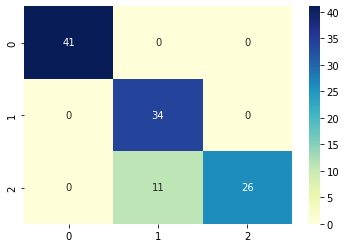

In [13]:
sns.heatmap(cm,cmap="YlGnBu",annot=True)

### Logistic-Multinomial Classification
- in multiclass the training algorith uses the one ve rest sccheme
- For ‘multinomial’ the loss minimised is the multinomial loss fit across the entire probability distribution, even when the data is binary

In [14]:
from sklearn.linear_model import LogisticRegression as LogR
model = LogR(multi_class="multinomial")

In [15]:
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [16]:
y_pred = model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor', 'Ir

In [17]:
as1=accuracy_score(y_test,y_pred)
as1

0.9464285714285714

In [18]:
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[41,  0,  0],
       [ 0, 33,  1],
       [ 0,  5, 32]], dtype=int64)

<AxesSubplot:>

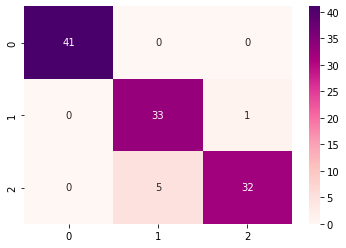

In [19]:
sns.heatmap(cm1,cmap="RdPu",annot=True)

# Naive Bayes Classifier using Feature Extraction

- it is a classification technique based on Baye's Theorem
- it is naive because it assumes that the presence of the certain features in a class is incependent of the presence of the other features

### 1. Import libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import dataset

In [21]:
dataset = pd.read_csv("emails.csv")
dataset.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


### 3. Feature Extraction: 
- sklearn.feature_extraction.text.CountVectorizer : Convert a collection of text documents to a matrix of token counts.
- since the credit card data has big text formats we are now conveting it to a matix using this

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [23]:
X = vectorizer.fit_transform(dataset["text"])

In [24]:
X

<5728x37303 sparse matrix of type '<class 'numpy.int64'>'
	with 708380 stored elements in Compressed Sparse Row format>

In [25]:
newX = X.toarray()
print(newX.shape)

(5728, 37303)


In [26]:
y = dataset.iloc[:,-1].values

In [27]:
newX.shape, y.shape

((5728, 37303), (5728,))

### 4. Taking care of missing data

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


### 5. Visualise the data

<AxesSubplot:xlabel='spam', ylabel='count'>

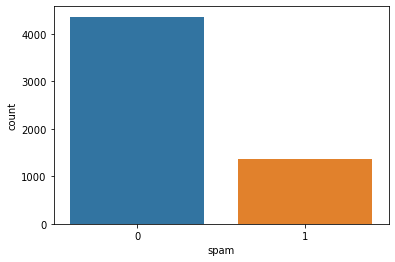

In [29]:
sns.countplot(x = dataset["spam"],data=dataset)

In [30]:
# splitting the spam into 0 and 1 and checking the length for clear insight:
no_spam = dataset[dataset["spam"]==0]
spam = dataset[dataset["spam"]==1]

print("number of no_spam records:",len(no_spam))
print("number of spam records:",len(spam))

number of no_spam records: 4360
number of spam records: 1368


### Train the model using Multinomial NB

In [31]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
classifier = MultinomialNB()

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(newX,y,test_size=0.2)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4582, 37303), (1146, 37303), (4582,), (1146,))

In [34]:
classifier.fit(X_train,y_train)

MultinomialNB()

### Evaluate the model using Multinomial NB

In [35]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

#ACCURACY:
print("Testing accuracy:",accuracy_score(y_test,classifier.predict(X_test)))

#F1-SCORE:
print("F1 score:",f1_score(y_test,classifier.predict(X_test)))

#PRECISION SCORE:
print("Precision score:",precision_score(y_test,classifier.predict(X_test)))

#RECALL SCORE:
print("Recall score:",recall_score(y_test,classifier.predict(X_test)))

Testing accuracy: 0.9895287958115183
F1 score: 0.9781818181818182
Precision score: 0.9607142857142857
Recall score: 0.9962962962962963


<AxesSubplot:>

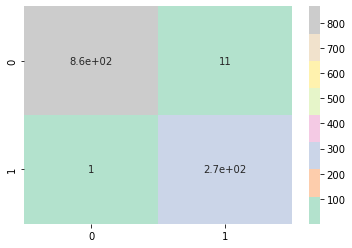

In [36]:
sns.heatmap(confusion_matrix(y_test,classifier.predict(X_test)),annot=True,cmap='Pastel2')

### Train the model using Gaussian NB

In [37]:
clsssifier2 = GaussianNB()

In [38]:
from sklearn.model_selection import train_test_split as tts
Xtrain,Xtest,Ytrain,Ytest= tts(newX,y,test_size=0.2)

In [39]:
Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape

((4582, 37303), (1146, 37303), (4582,), (1146,))

In [40]:
clsssifier2.fit(Xtrain,Ytrain)

GaussianNB()

### Evaluate the model using Gaussian NB

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score

#ACCURACY:
print("Testing accuracy:",accuracy_score(y_test,classifier.predict(X_test)))

#F1-SCORE:
print("F1 score:",f1_score(y_test,classifier.predict(X_test)))

#PRECISION SCORE:
print("Precision score:",precision_score(y_test,classifier.predict(X_test)))

#RECALL SCORE:
print("Recall score:",recall_score(y_test,classifier.predict(X_test)))

Testing accuracy: 0.9895287958115183
F1 score: 0.9781818181818182
Precision score: 0.9607142857142857
Recall score: 0.9962962962962963


<AxesSubplot:>

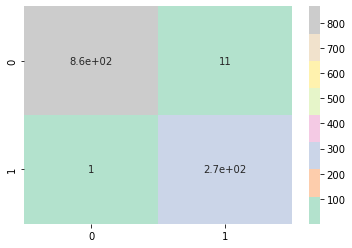

In [42]:
sns.heatmap(confusion_matrix(y_test,classifier.predict(X_test)),annot=True,cmap='Pastel2')

# Naive Bayes Classifier

### 1. Import libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Import dataset

In [44]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [45]:
z = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
z

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

### 3. Scaling the dataset

In [46]:
#scaling the dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
znew = sc.fit_transform(z)
znew

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

### 4. Visualise the datset

<AxesSubplot:xlabel='Class', ylabel='count'>

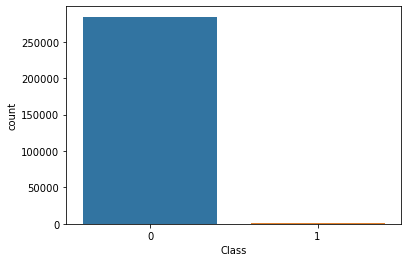

In [47]:
sns.countplot(data=data,x=data['Class'])

In [48]:
X.shape

(5728, 37303)

### 5. Splitting the data to train and test set

In [49]:
from sklearn.model_selection import train_test_split
z_train,z_test,y_train, y_test = train_test_split(z,y,test_size=0.2)

In [50]:
z_train.shape,y_train.shape, z_test.shape, y_test.shape

((227845, 30), (227845,), (56962, 30), (56962,))

### 6. Train the model

In [51]:
from sklearn.naive_bayes import GaussianNB
spam_model = GaussianNB()
spam_model.fit(z_train,y_train)
y_pred = spam_model.predict(z_test)

### 7. Evaluate the model

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9928724412766405

In [53]:
cmat =confusion_matrix(y_test,y_pred)
cmat

array([[56491,   361],
       [   45,    65]], dtype=int64)

<AxesSubplot:>

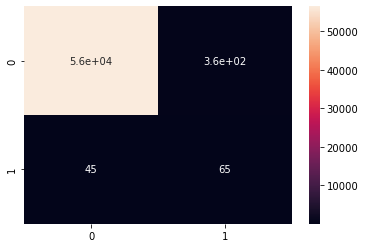

In [54]:
sns.heatmap(cmat,annot=True)